# Batterietester für eine Autobatterie

Technische Universität Berlin, Straße des 17. Juni 135, 10623 Berlin, Deutschland

---

**Clarissa Pinheiro** (Kurs 348T)

E-mail: cvpinheiro13@gmail.com

**Sofía Rodríguez** (Kurs 348T)

E-mail: sofiaerb@hotmail.com

**Vasu Seghal** (Kurs 348T)

E-mail: vasusehgal10611@gmail.com 

**Allan A. Zea** (Kurs 348T)

E-mail: zealobo@campus.tu-berlin.de

---

Eine Autobatterie hat eine Leerlaufspannung von $12~\textrm{V}$. Ist sie voll geladen, hat sie einen
Innenwiderstand von ca. $20~\textrm{m}\Omega$. An die Pole werden nun verschiedene Widerstände $R$
angeschlossen und die Spannung, die über $R$ abfällt, mit einem Voltmeter gemessen.
Alle Widerstände sind vom Hersteller mit $5\%$ Toleranz spezifiziert. Im Stromkreis wird ein
Schalter eingebaut, um im Wechsel die Leerlaufspannung $U_0$ und die Klemmspannung $U_k$
zu messen. Das Spannungsmeßgerät war sehr günstig bei Ebay gekauft worden.

Folgendende Messwerte werden ermittelt:

Sie beobachten während der Umsetzung der Planung einen zunehmend unangenehmen
Geruch und Funkenbildung. Nach dem Experiment haben Sie verbrannte Finger und
der Schalter ist defekt. Bitte haben Sie Augenmerk auf mögliche Ausreißer durch die
hektische Messung. 

In [1]:
library(scales)
library(ggplot2)

bt_tabelle <- t(read.csv('Daten/batterietesterdaten.csv', header = TRUE, sep = ","))
str(bt_tabelle) 
head(bt_tabelle)

 chr [1:14, 1:8] "1" "1e+02" "12.03" "11.63" "12.34" "11.95" "11.73" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:14] "Nr." "R" "U0.1" "Uk.1" ...
  ..$ : NULL


[,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8] 
Nr.  1     2     3     4     5     6     7     8    
R    1e+02 1e+01 3e+00 1e+00 3e-01 1e-01 3e-02 1e-02
U0.1 12.03 11.65 11.94 12.31 11.84 12.40 11.97 11.53
Uk.1 11.63 12.58 11.47 11.03  9.18  6.08  2.31  0.96
U0.2 12.34 12.32 12.01 12.10 11.92 12.17 12.01 10.35
Uk.2 11.95 12.19 11.83 11.37  8.46  5.95  1.97  0.99

ohne die fehlenden Werte (sog. 'NA') mit zu berücksichtigen

In [2]:
fp_tabelle[(which(fp_tabelle[2:11,1] != 'NA')+1), 1]

T30.1 T30.2 T30.3 T30.4 T30.5 T30.6 T30.7 
 9.72 10.49 10.10  9.98 10.34 10.00 10.00

Jetzt sind wir in der Lage, die Länge, den Mittelwert und die Standardabweichung für jeden dieser Versuche zu ermitteln.

In [9]:
laenge <- c()
mittelwerte <- c()
standard_abweichungen <- c()

for (k in 1:4) { 
  messungen <- c(fp_tabelle[(which(fp_tabelle[2:11, k] != 'NA')+1), k])
  laenge <- c(laenge, length(messungen))
  mittelwerte <- c(mittelwerte, mean(messungen))
  standard_abweichungen <- c(standard_abweichungen, sd(messungen))
}

In [20]:
mittelwerte <- mittelwerte / 30
standard_abweichungen <- standard_abweichungen / 30

fehler_mittel <- standard_abweichungen / laenge
rel_fehler <- fehler_mittel / mittelwerte

cat("\n Mittelwerte: ", mittelwerte, sep = "  ")
cat("\n Standardabweichungen: ", standard_abweichungen, sep = "  ")
cat("\n Fehler der Mittelwerte: ", fehler_mittel, sep = "  ")
cat("\n Relative Fehler: ", percent(rel_fehler), sep = "  ")


 Mittelwerte:   0.0003737037  0.0005145503  0.0005821296  0.0006916667
 Standardabweichungen:   9.415958e-06  1.60727e-05  1.431669e-05  1.562033e-05
 Fehler der Mittelwerte:   1.345137e-06  2.2961e-06  1.789586e-06  1.562033e-06
 Relative Fehler:   0.360%  0.446%  0.307%  0.226%

In [58]:
2*rel_fehler*(periode)
percent(2*rel_fehler*(mittelwerte^2)/periode)

[1] 1.005365e-09 2.362918e-09 2.083543e-09 2.160813e-09

[1] "0.720%" "0.892%" "0.615%" "0.452%"

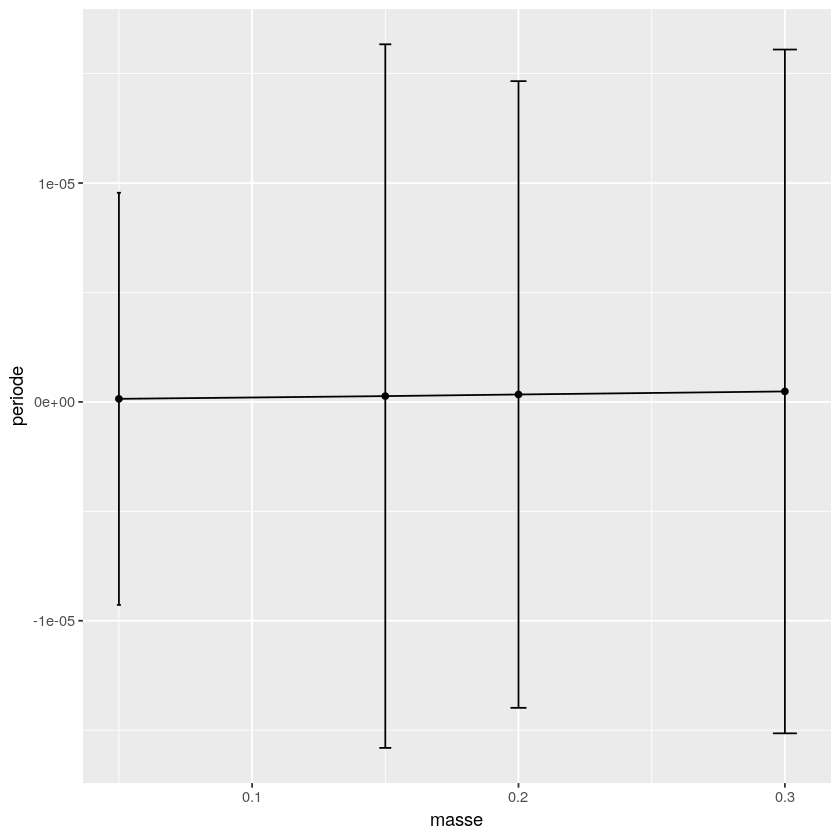

In [78]:
df <- data.frame(masse = c(0.05, 0.15, 0.20, 0.30), periode = mittelwerte^2)

p <- ggplot(df, aes(x = masse, y = periode)) + 
     geom_line() + 
     geom_point() +
     geom_errorbar(aes(ymin = periode - standard_abweichungen, 
                       ymax = periode + standard_abweichungen),
                   width = 0.03*c(0.05, 0.15, 0.20, 0.30))

print(p)

---